In [32]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

data = pd.read_csv("marketing_campaigns.csv", delimiter =';')

In [6]:
data.shape



(91, 5)

In [7]:
data.isnull().values.any()

False

In [8]:
data.head()

,Week,Campaign,Visits,Revenue,Cost
0,1,Aldebaran,27,2.269511,3.763627
1,2,Aldebaran,64,10.820403,15.322613
2,3,Aldebaran,80,7.132998,10.753533
3,4,Aldebaran,93,11.085813,16.906191
4,5,Aldebaran,120,14.282481,21.446570


In [9]:
data.tail()

,Week,Campaign,Visits,Revenue,Cost
86,27,Cottington,158,451.901583,490.776231
87,28,Cottington,151,421.580540,454.750280
88,29,Cottington,159,463.249265,507.521951
89,30,Cottington,125,357.412673,389.868883
90,30,Cottington,125,357.412673,389.868883


In [10]:
data = data[:-1]

In [11]:
campaigns = pd.value_counts(data['Campaign'], sort = True)
campaigns

Aldebaran     30
Bartledan     30
Cottington    30
Name: Campaign, dtype: int64

In [23]:
data_cot = data[data['Campaign'] == 'Cottington']
data_cot = data_cot.reset_index(drop=True)
data_ald = data[data['Campaign'] == 'Aldebaran']
data_ald = data_ald.reset_index(drop=True)
data_bar = data[data['Campaign'] == 'Bartledan']
data_bar = data_bar.reset_index(drop=True)

data_sum = data_cot+data_ald+data_bar
data_sum = data_sum.reset_index(drop=True)

In [24]:
roi_cot = (np.sum(data_cot['Revenue'])-np.sum(data_cot['Cost']))*100/np.sum(data_cot['Cost'])
roi_ald = (np.sum(data_ald['Revenue'])-np.sum(data_ald['Cost']))*100/np.sum(data_ald['Cost'])
roi_bar = (np.sum(data_bar['Revenue'])-np.sum(data_bar['Cost']))*100/np.sum(data_bar['Cost'])

In [25]:
cum_bar = pd.DataFrame().reindex_like(data_bar)
cum_cot = pd.DataFrame().reindex_like(data_cot)
cum_ald = pd.DataFrame().reindex_like(data_ald)
cum_all = pd.DataFrame().reindex_like(data_sum)

In [26]:
cum_bar['Visits'] = np.cumsum(data_bar['Visits'])
cum_bar['Revenue'] = np.cumsum(data_bar['Revenue'])
cum_bar['Cost'] = np.cumsum(data_bar['Cost'])

cum_cot['Visits'] = np.cumsum(data_cot['Visits'])
cum_cot['Revenue'] = np.cumsum(data_cot['Revenue'])
cum_cot['Cost'] = np.cumsum(data_cot['Cost'])

cum_ald['Visits'] = np.cumsum(data_ald['Visits'])
cum_ald['Revenue'] = np.cumsum(data_ald['Revenue'])
cum_ald['Cost'] = np.cumsum(data_ald['Cost'])

cum_all['Visits'] = np.cumsum(data_sum['Visits'])
cum_all['Revenue'] = np.cumsum(data_sum['Revenue'])
cum_all['Cost'] = np.cumsum(data_sum['Cost'])

In [27]:
pr_roi_cot = (cum_cot['Revenue']-cum_cot['Cost'])*100/cum_cot['Cost']
pr_roi_ald = (cum_ald['Revenue']-cum_ald['Cost'])*100/cum_ald['Cost']
pr_roi_bar = (cum_bar['Revenue']-cum_bar['Cost'])*100/cum_bar['Cost']

In [28]:
gr1_bar = []
gr1_ald = []
gr1_cot = []

vis_bar = []
vis_ald = []
vis_cot = []


for i in range(0,len(cum_bar)-1):
    gr1_bar.append((cum_bar['Revenue'][i+1]-cum_bar['Revenue'][i])*100/cum_bar['Revenue'][i])
    gr1_ald.append((cum_ald['Revenue'][i+1]-cum_ald['Revenue'][i])*100/cum_ald['Revenue'][i])
    gr1_cot.append((cum_cot['Revenue'][i+1]-cum_cot['Revenue'][i])*100/cum_cot['Revenue'][i])
    
    vis_cot.append((cum_cot['Visits'][i+1]-cum_cot['Visits'][i])*100/cum_cot['Visits'][i])
    vis_ald.append((cum_ald['Visits'][i+1]-cum_ald['Visits'][i])*100/cum_ald['Visits'][i])
    vis_bar.append((cum_bar['Visits'][i+1]-cum_bar['Visits'][i])*100/cum_bar['Visits'][i])
    


In [29]:
av_cot = round(np.mean(gr1_cot[15:29]))
av_ald = round(np.mean(gr1_ald[15:29]))
av_bar = round(np.mean(gr1_bar[15:29]))

avis_bar = round(np.mean(vis_bar))
avis_ald = round(np.mean(vis_ald))
avis_cot = round(np.mean(vis_cot))

In [30]:
print(avis_bar, avis_ald, avis_cot)
print(av_cot, av_ald, av_bar)
print(cum_cot['Visits'][29], cum_ald['Visits'][29], cum_bar['Visits'][29] )

15.0 27.0 14.0
5.0 11.0 7.0
4523 9620 5188


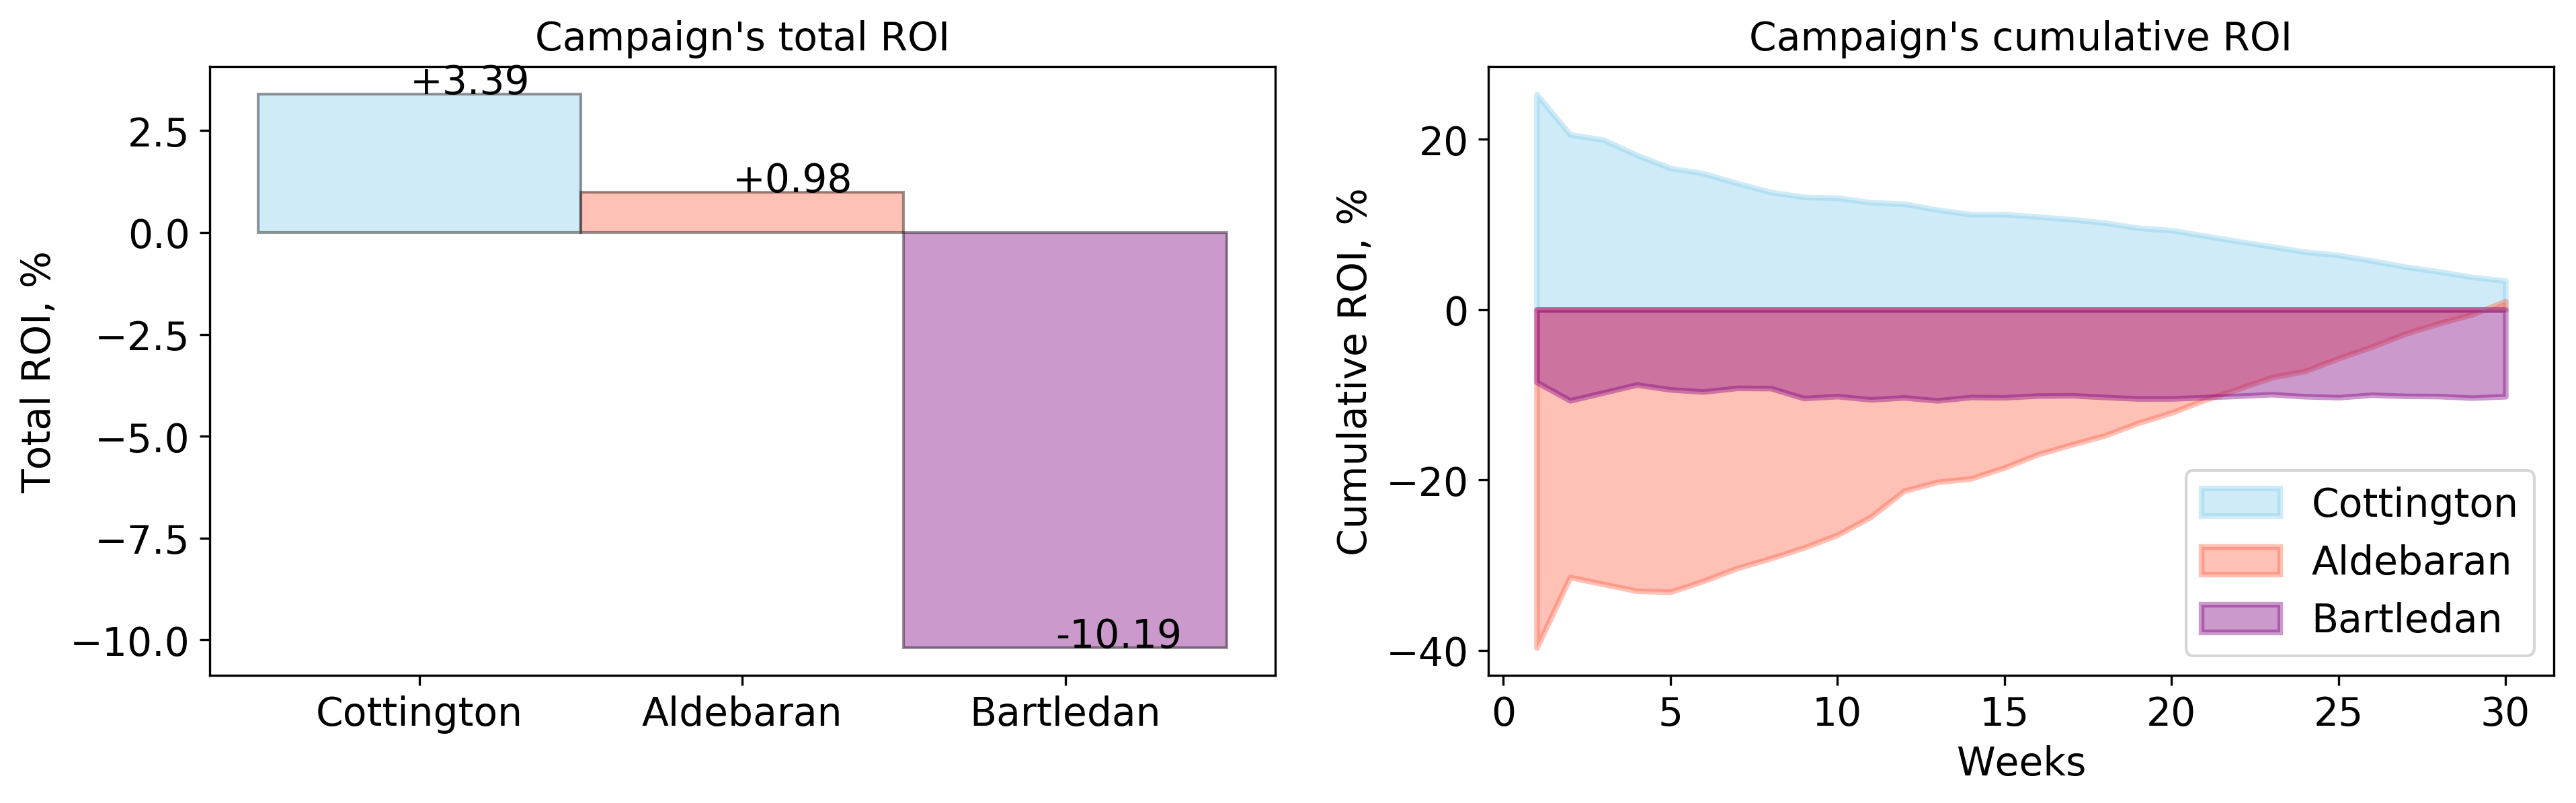

In [36]:
rcParams['figure.dpi']= 300
rcParams['axes.titlesize'] = 14
rcParams['font.size'] = 14
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
labels = ['Cottington', 'Aldebaran', 'Bartledan']

fig = plt.figure(figsize=(15, 4))
r1 = range(1, len(data_bar)+1)




ax = fig.add_subplot(121)
 
 
#Values of each group
bars1 = roi_cot
bars2 = roi_ald
bars3 = roi_bar




pos = [1,2,3]

barWidth = 1




l1 = plt.bar(pos[0], bars1, edgecolor='black', width=barWidth, alpha=0.4, label='Cottington', color='skyblue')

l2 = plt.bar(pos[1], bars2, edgecolor='black', width=barWidth, alpha=0.4, label= 'Aldebaran', color='tomato')

l3 = plt.bar(pos[2], bars3, edgecolor='black', width=barWidth, alpha=0.4, label= 'Bartledan', color='purple')

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))



ax.set_ylabel('Total ROI, %')
plt.title("Campaign's total ROI")
ax.set_xticks(pos)
ax.set_xticklabels(labels)


ax2 = fig.add_subplot(122)


l1 = plt.fill_between(r1, pr_roi_cot, alpha = 0.4, color="skyblue", edgecolor='skyblue', linewidth=2, label = 'Cottington')
l2 = plt.fill_between(r1, pr_roi_ald, alpha = 0.4, color="tomato", edgecolor='tomato', linewidth=2, label = 'Aldebaran')
l3 = plt.fill_between(r1, pr_roi_bar, alpha = 0.4, color="purple", edgecolor='purple', linewidth=2, label = 'Bartledan')
ax2.legend(loc='lower right')
ax2.set_ylabel('Cumulative amount')





ax2.legend(loc='lower right')
ax2.set_ylabel('Cumulative ROI, %')
ax2.set_xlabel('Weeks')
plt.title("Campaign's cumulative ROI")

plt.show()